<a href="https://colab.research.google.com/github/Manojkumar310897/Task-7/blob/main/Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

**Importing the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Copy of Social_Network_Ads.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


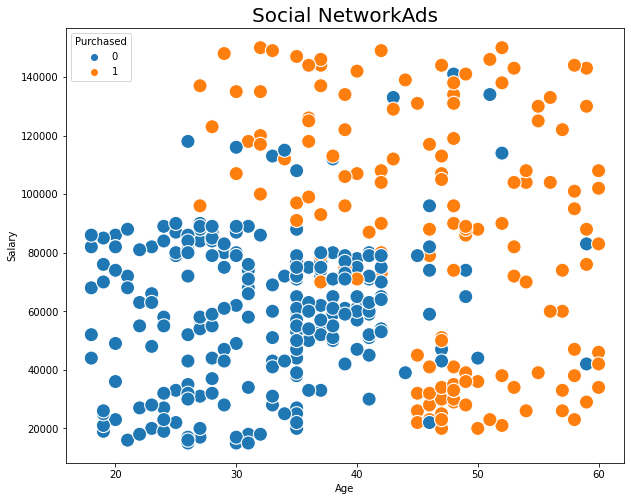

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Age',y='EstimatedSalary',hue='Purchased',data=df,s=200)
plt.title("Social NetworkAds",fontsize=20)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

In [ ]:
df=df.drop(['User ID'],axis=1)

In [ ]:
df['Gender']=df['Gender'].map({'Male':1,"Female":0})
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [ ]:
X = df.drop(['Purchased'],axis=1).values 
y = df['Purchased'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 1.67009484, -0.98019606,  0.58164944, -0.88670699],
       [-1.52442817,  1.02020406, -0.60673761,  1.46173768],
       [ 0.59613378, -0.98019606, -0.01254409, -0.5677824 ],
       ...,
       [-1.4150439 ,  1.02020406, -0.21060859, -0.50979612],
       [ 1.19419143, -0.98019606, -1.10189888, -0.45180983],
       [ 1.45259625, -0.98019606, -1.20093113,  1.40375139]])

**Fitting K-NN to the Training set**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

**Predicting the Test set results**

In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
from sklearn.model_selection import cross_val_score 
knn.score(X_test,y_test)
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  :  1  train score :  1.0  score :  0.8633333333333333
K value  :  2  train score :  0.9233333333333333  score :  0.8300000000000001
K value  :  3  train score :  0.9233333333333333  score :  0.9
K value  :  4  train score :  0.9066666666666666  score :  0.8700000000000001
K value  :  5  train score :  0.92  score :  0.8966666666666667
K value  :  6  train score :  0.9166666666666666  score :  0.8666666666666668
K value  :  7  train score :  0.9133333333333333  score :  0.8933333333333333
K value  :  8  train score :  0.91  score :  0.89
K value  :  9  train score :  0.9133333333333333  score :  0.8866666666666667
K value  :  10  train score :  0.8966666666666666  score :  0.8733333333333334
K value  :  20  train score :  0.8533333333333334  score :  0.8266666666666668
K value  :  50  train score :  0.7666666666666667  score :  0.7533333333333333


**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm     

array([[67,  1],
       [16, 16]])

Text(42.0, 0.5, 'Truth')

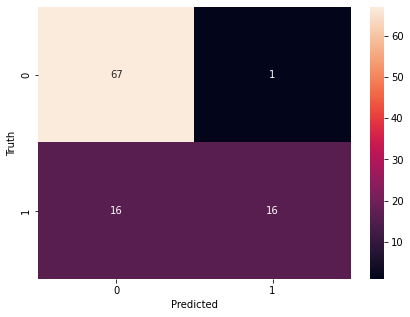

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
